In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Housing.csv')#loading data - 1

In [2]:
df.head() # understanding data by looking at first five rows -2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(df.shape) # no. of rows,col in dataset

(545, 13)


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [5]:
print(df.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
cols_to_change = ['mainroad']  # example column names

for col in cols_to_change:
    df[col] = np.where(df[col].str.contains('no', case=False, na=False), 0, 1)

In [7]:
df['mainroad'].value_counts()

,count
mainroad,
1,468
0,77


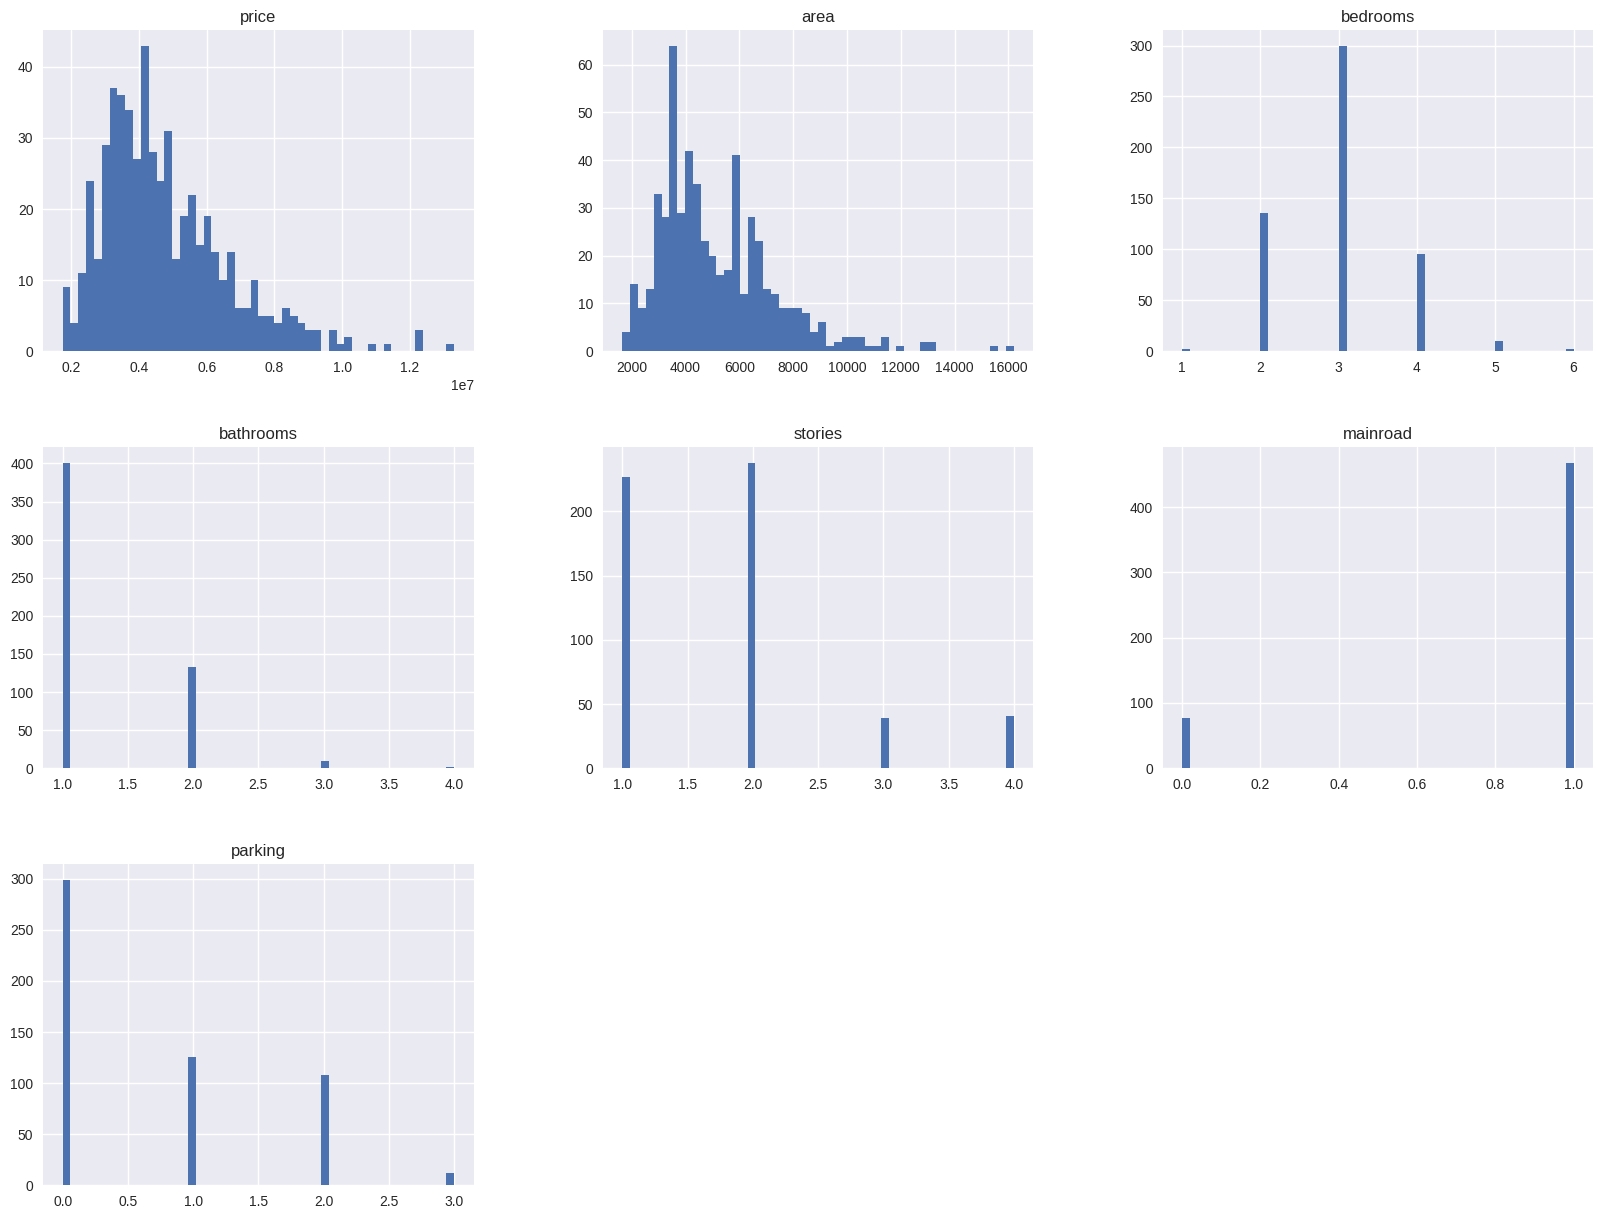

In [8]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
mapping_dict = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}

df['furnishingstatus'] = df['furnishingstatus'].map(mapping_dict)

In [17]:
# Convert 'airconditioning' column to numerical (0 for 'no', 1 for 'yes')
df['airconditioning'] = np.where(df['airconditioning'].str.contains('no', case=False, na=False), 0, 1)

df.corr()

,price,area,bathrooms,stories,airconditioning
price,1.000000,0.535997,0.517545,0.420712,0.452954
area,0.535997,1.000000,0.193820,0.083996,0.222393
bathrooms,0.517545,0.193820,1.000000,0.326165,0.186915
stories,0.420712,0.083996,0.326165,1.000000,0.293602
airconditioning,0.452954,0.222393,0.186915,0.293602,1.000000


In [26]:
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))


price                1.000000
area                 0.535997
bathrooms            0.517545
airconditioning_1    0.452954
stories              0.420712
Name: price, dtype: float64


In [28]:
X = df[['area', 'bathrooms', 'stories', 'airconditioning_1']].values.astype(float)
y = df['price'].values.reshape(-1, 1)


In [20]:
print(df.columns)


Index(['price', 'area', 'bathrooms', 'stories', 'airconditioning'], dtype='object')


In [31]:
df = pd.get_dummies(df, columns=['airconditioning_1'], drop_first=True)


In [34]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

In [35]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = X.shape[0]
    theta = np.random.randn(X.shape[1], 1)

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta

In [36]:
# Apply batch gradient descent
theta = batch_gradient_descent(X, y)
print("Optimal parameters (theta):")
print(theta)

Optimal parameters (theta):
[[750348.90653944]
 [609633.89547824]
 [392055.15842983]
 [450515.33522262]]


In [37]:
def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
theta_batch = batch_gradient_descent(X, y)
y_pred_batch = X.dot(theta_batch)
mse_batch = mean_squared_error_manual(y, y_pred_batch)
print("Mean Squared Error (MSE) for Batch Gradient Descent:", mse_batch)


Mean Squared Error (MSE) for Batch Gradient Descent: 24183085239955.14


In [39]:
def online_gradient_descent(X, y, learning_rate=0.01, n_epochs=10):
    m = X.shape[0]
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(n_epochs):
        for i in range(m):
            xi = X[i:i+1]  # shape: (1, n_features)
            yi = y[i:i+1]  # shape: (1, 1)
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

    return theta

In [40]:
theta_batch = online_gradient_descent(X, y)
y_pred_batch = X.dot(theta_batch)
mse_batch = mean_squared_error_manual(y, y_pred_batch)
print("Mean Squared Error (MSE) for Batch Gradient Descent:", mse_batch)

Mean Squared Error (MSE) for Batch Gradient Descent: 36847847427827.82
